In [1]:
%load_ext lab_black

In [2]:
import requests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")


Bad key "text.kerning_factor" on line 4 in
/home/paul/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Questions

* Can we identify spikes in payments made to miners and attribute those spikes to anything?

In [3]:
import psycopg2

conn_string = "host='localhost' dbname='mev_inspect' user='postgres' password='password' port='6543'"
conn = psycopg2.connect(conn_string)

In [4]:
df_mp = pd.read_sql(
    """
select * from miner_payments

""",
    conn,
)

In [5]:
df_mp.tail()

,created_at,block_number,transaction_hash,transaction_index,miner_address,coinbase_transfer,base_fee_per_gas,gas_price,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address
1761058,2022-05-31 03:30:50.338073,14876465.0,0xf334cc22eff5f5f95d043a73d03122f545d7bed26a77...,47.0,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,0.0,8.877622e+10,9.027622e+10,9.027622e+10,72164.0,0x7f268357a8c2552623316e2562d90e642bb538e5,0x0aad99f0626e2127a2a584feab71071f4cb55479
1761059,2022-05-31 03:30:50.338073,14876465.0,0x309a3cee36129de1e548e93f8830f0e5f1d1b6ce75f7...,48.0,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,0.0,8.877622e+10,9.027622e+10,9.027622e+10,199942.0,0x32f2a60942e7563cfc42766018641c6c6b10830e,0x99a851a2f0d75be75ea131e804f13b1527bdf62d
1761060,2022-05-31 03:30:50.338073,14876465.0,0x791660f79b7d57a3d1fea6e3656cfe56823a03da5156...,49.0,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,0.0,8.877622e+10,9.027622e+10,9.027622e+10,72128.0,0x7f268357a8c2552623316e2562d90e642bb538e5,0xf9d2ed5a26d43a90bac6236fbe58a8761822b73c
1761061,2022-05-31 03:30:50.338073,14876465.0,0xfa18f4a6171550fe26fbe4f634077107002a2f453b45...,50.0,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,0.0,8.877622e+10,9.027622e+10,9.027622e+10,228650.0,0x7f268357a8c2552623316e2562d90e642bb538e5,0xf1c9b0b3a84247a88d4a3962feeab0651d9c06d1
1761062,2022-05-31 03:30:50.338073,14876465.0,0xa2b36fe8bfc8b2910c056d8b3a00baea30beaf147755...,51.0,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,0.0,8.877622e+10,9.017622e+10,9.017622e+10,32128.0,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0x1f434da6b4c0af73cd3d6cd846877f3e3d685da8


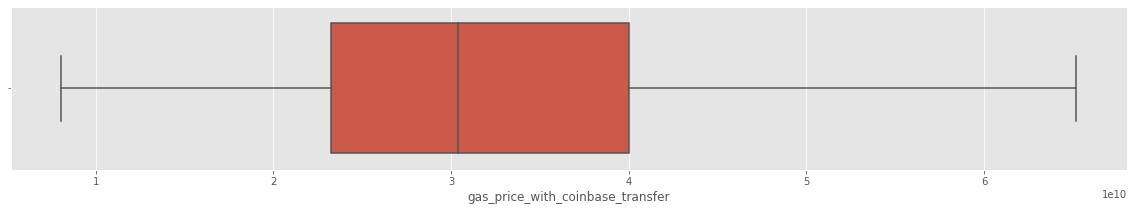

In [6]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.boxplot(x=df_mp.gas_price_with_coinbase_transfer, showfliers=False)

Text(0.5, 1.0, 'Reward Paid To Miners Over Time')

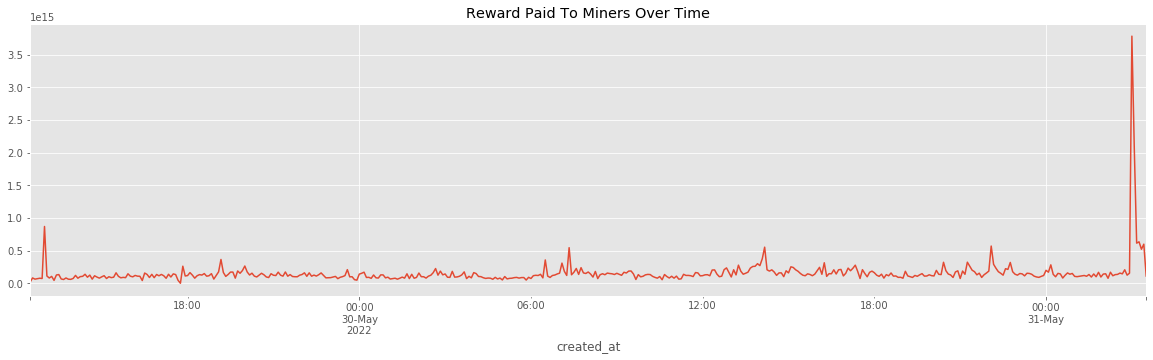

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))

df_mp.set_index("created_at").resample(
    "5T"
).gas_price_with_coinbase_transfer.sum().plot().set_title(
    "Reward Paid To Miners Over Time"
)

Text(0.5, 1.0, 'N Payments To Miners Over Time')

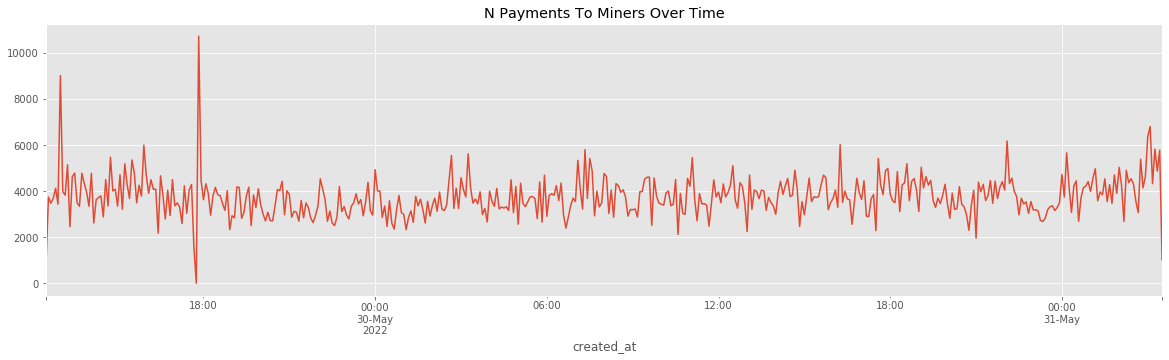

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

df_mp.set_index("created_at").resample("5T").size().plot().set_title(
    "N Payments To Miners Over Time"
)